## Median Household income vs Percent Unemployed by City 

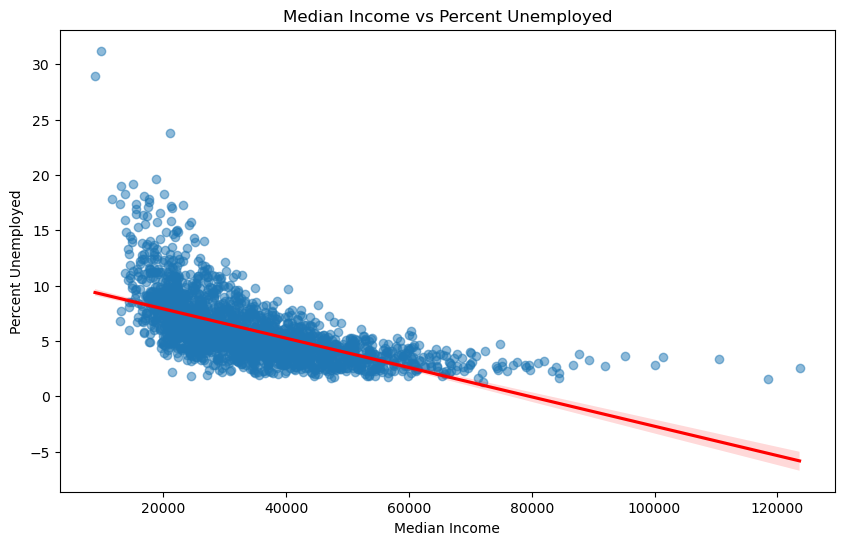

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'Final Cleaned and Merged Data.csv'
data = pd.read_csv(file_path)

# Plot the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='medincome', y='pctunemployed', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Median Income vs Percent Unemployed')
plt.xlabel('Median Income')
plt.ylabel('Percent Unemployed')
plt.show()


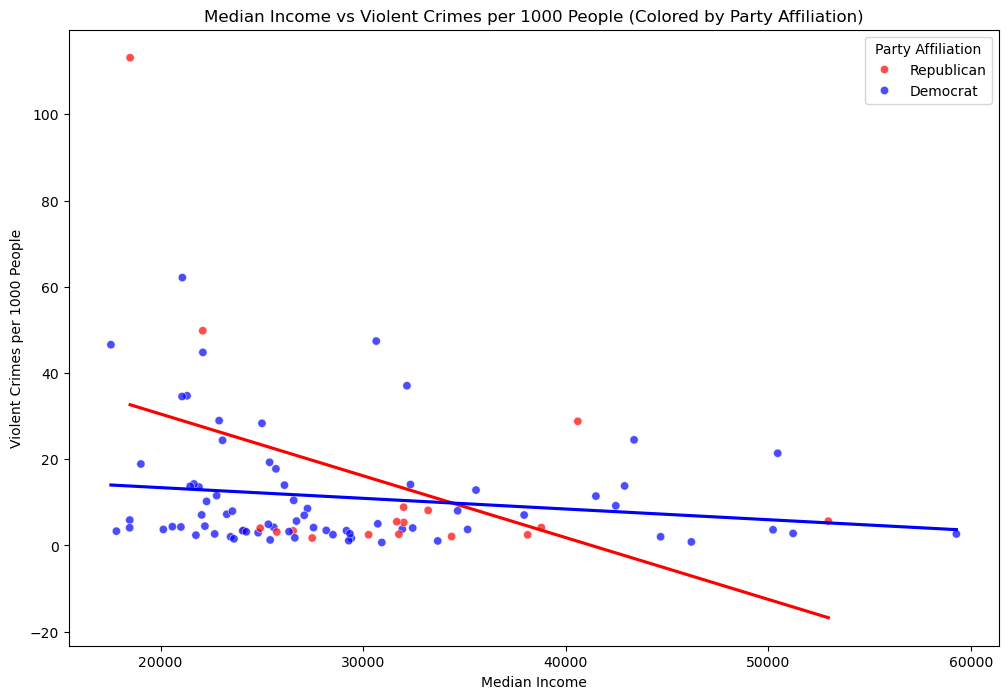

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'Final Cleaned and Merged Data.csv'
data = pd.read_csv(file_path)

# Ensure the 'population' column exists and calculate violent crimes per 1000 people
data['violentcrimes_per_1000'] = (data['violentcrimesperpop'] / data['population']) * 1000

# Filter data to include only rows with party affiliation as 'Republican' or 'Democrat'
filtered_data = data[data['party affiliation'].isin(['Republican', 'Democrat'])]

# Define custom color palette for party affiliation
party_palette = {'Republican': 'red', 'Democrat': 'blue'}

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='medincome', 
    y='violentcrimes_per_1000', 
    hue='party affiliation', 
    palette=party_palette, 
    data=filtered_data,
    alpha=0.7
)

# Add separate regression lines for each party affiliation
for party, color in party_palette.items():
    sns.regplot(
        x='medincome', 
        y='violentcrimes_per_1000', 
        data=filtered_data[filtered_data['party affiliation'] == party], 
        scatter=False, 
        line_kws={'color': color},
        ci=None  # Removes the grey confidence interval
    )

# Add plot title and labels
plt.title('Median Income vs Violent Crimes per 1000 People (Colored by Party Affiliation)')
plt.xlabel('Median Income')
plt.ylabel('Violent Crimes per 1000 People')
plt.legend(title='Party Affiliation')
plt.show()


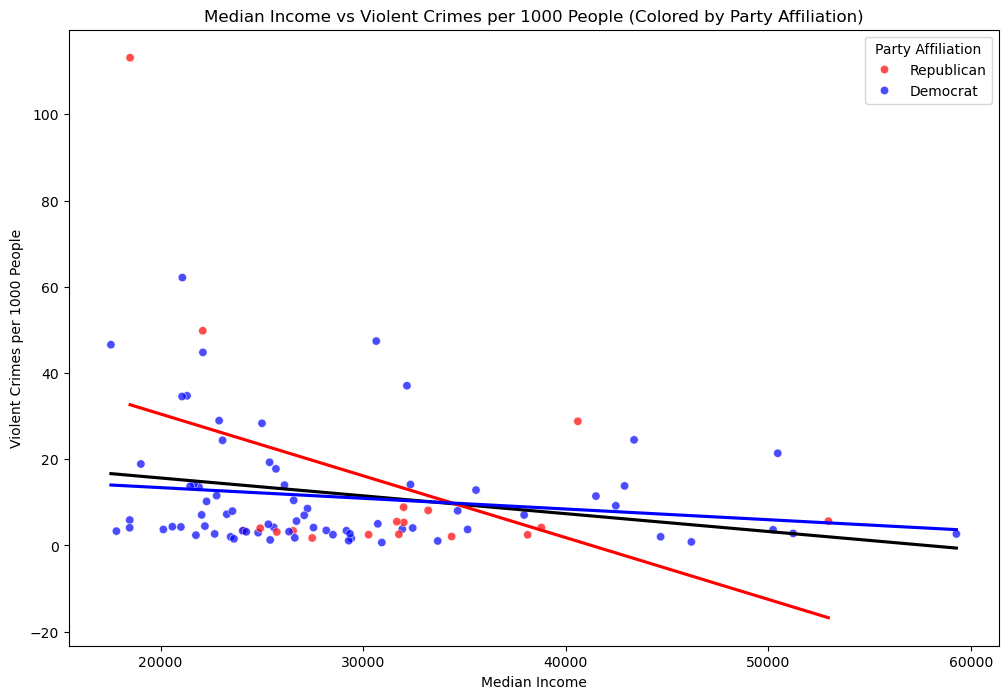

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'Final Cleaned and Merged Data.csv'
data = pd.read_csv(file_path)

# Ensure the 'population' column exists and calculate violent crimes per 1000 people
data['violentcrimes_per_1000'] = (data['violentcrimesperpop'] / data['population']) * 1000

# Filter data to include only rows with party affiliation as 'Republican' or 'Democrat'
filtered_data = data[data['party affiliation'].isin(['Republican', 'Democrat'])]

# Define custom color palette for party affiliation
party_palette = {'Republican': 'red', 'Democrat': 'blue'}

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='medincome', 
    y='violentcrimes_per_1000', 
    hue='party affiliation', 
    palette=party_palette, 
    data=filtered_data,
    alpha=0.7
)

# Add overall regression line (black)
sns.regplot(
    x='medincome', 
    y='violentcrimes_per_1000', 
    data=filtered_data, 
    scatter=False, 
    line_kws={'color': 'black'},
    ci=None  # Removes confidence interval
)

# Add separate regression lines for each party affiliation
for party, color in party_palette.items():
    sns.regplot(
        x='medincome', 
        y='violentcrimes_per_1000', 
        data=filtered_data[filtered_data['party affiliation'] == party], 
        scatter=False, 
        line_kws={'color': color},
        ci=None  # Removes confidence interval
    )

# Add plot title and labels
plt.title('Median Income vs Violent Crimes per 1000 People (Colored by Party Affiliation)')
plt.xlabel('Median Income')
plt.ylabel('Violent Crimes per 1000 People')
plt.legend(title='Party Affiliation')
plt.show()
